In [138]:
class Node:
    """
    class constructor should take one argument:
    dictionary with a name of the node as a key and a list of nodes it is connected to as value.
    For example
    >>>Node({'A':['B','C']})
    
    Note 1,
    that the node may not have any connections, thus empty list is a legal dictionary value.
    >>>Node({'A':[]})

    Note 2,
    any other input to the node should result in an error.
    """
    def __init__(self, node_dict):
        if type(node_dict)== dict: 
            node = list(node_dict.keys())
            if len(node) == 1 and type(node_dict[node[0]]) == list:
                self.node_dict = node_dict
                self.node = node[0]
                self.connections = node_dict[node[0]]
            else:
                raise ValueError('dictionary must contain infomation about a single node,'+
                                 'node connections must be of type list')
        else: 
            raise ValueError('node must be of type dict')
            
            
    def __str__(self):
        """
        returns string representation
        >>>{"node:[vertex, vertex]}
        """
        return str(self.node_dict)

In [221]:
class Graph:

    def __init__(self, node_list=[]):
        """
        The constructor accepts a list of valid nodes, if no list is given, the graph is instantiated empty.
        """
        if all(type(n) == Node for n in node_list):
            self.node_list = node_list
            self.g = {}
            for n in node_list:
                self.g[n.node]=n
        else:
            raise ValueError('node_list contains invaild nodes')
            
            
    def add(self, node):
        """
        adds the node to the graph
        """
        if type(node) == Node:
            self.node_list.append(node)
            self.g[node.node]=node.connections
        else:
            raise ValueError('node must be of type Node')
            

    def delete(self, node):
        """
        deletes given node from the graph
        """
        self.node_list.remove(node)
        self.g.pop(node.node, None)

        
    def find_path_dfs(self, start_node, end_node):
        """
        return one path between start and end
        search is performed Depth-First
        """
        stack = [(start_node.node, [start_node.node])]
        visited = []
        while stack:
            (vertex, path) = stack.pop()
            if vertex not in visited:
                if vertex == end_node.node:
                    return [self.g[v] for v in path]
                visited.append(vertex)
                for connection in self.g[vertex].connections:
                    stack.append((connection, path + [connection]))
        
        # If there is no path 
        return []
    
    def find_path_bi(self, start_node, end_node):
        """
        return one path between start and end
        search is performed Bidirectional
        [Node 1, Node 2, Node 3]
        """
        #make this a queue instead of a sna
        stackF = [(start_node.node, [start_node.node])]
        stackB = [(end_node.node, [end_node.node])]
        visitedF = []
        visitedB = []
        while stackF and stackB:
            (vertexF, pathF) = stackF.pop()
            if vertexF not in visitedF:
                if vertexF == end_node.node:
                    return [self.g[v] for v in pathF]
                visitedF.append(vertexF)
                for connectionF in self.g[vertexF].connections:
                    stackF.append((connectionF, pathF + [connectionF]))
            (vertex, pathB) = stackB.pop()
            if vertex not in visitedB:
                if vertex == start_node.node:
                    return [self.g[v] for v in pathB]
                visitedB.append(vertex)
                for connection in self.g[vertex].connections:
                    stackB.append((connection, [connection] + pathB))
        # If there is no path 
        return []
        
    def find_all_paths(self, start_node, end_node):
        """
        returns a list with all paths between start and end, the list is empty if no path is found. 
        Use traversal method of your choice.
        """
        all_paths = []
        for c in start_node.connections:
            stack = [(c, [start_node.node, c])]
            visited = []
            while stack:
                (vertex, path) = stack.pop()
                if vertex not in visited:
                    if vertex == end_node.node:
                        new_path = [self.g[v] for v in path]
                        all_paths.append(new_path)
                    else:
                        visited.append(vertex)
                    for connection in self.g[vertex].connections:
                        stack.append((connection, path + [connection]))
        return [non_loop for non_loop in all_paths if len(non_loop) == len(set(non_loop))]
        
        
    def find_shortest_path(self, start_node, end_node):
        """
        returns the shortest path between start and end, or None if no path was found.
        """
        all_paths = self.find_all_paths(start_node, end_node)
        if all_paths != []:
            return min(all_paths, key=len)
        else:
            return None
        
        
    def has_route(self, start_node, end_node):
        """
        design an algorithm to return True if there is at least one path between
        start_node and end_node, otherwise returns False
        """
        a_path = self.find_path_dfs(start_node, end_node)
        if len(a_path) > 0:
            return True
        else:
            return False
    
        
    def print_path(self, path):
        """
        Given the path 'A' to 'B' to 'C', print the path in following format:
        'A'->'B'->'C'
        The node names have to come in order
        """
        path_w_names = [n.node for n in path]
        return '->'.join(path_w_names)
            
    def __str__(self):
        """
        returns a list representation with each node
        >>>[{'A':['B','C']},{'D':['B','C']},{'B':['C','E']}]
        """
        string_list= [str(n) for n in self.node_list]
        string_joined = "[{}]".format(', '.join(string_list))
        return (string_joined)

In [229]:
#from graph import *

def test_empty_node():
    """
    tests creation of empty node
    """
    assert type(Node({'A':[]})) == Node

    
def test_error_node():
    """
    tests creation of bad node
    Node({'a':'a'})
    have to pass since the test is written to test error
    """
    try:
        Node({'a':'a'})
        raised_error = False
    except:
        raised_error = True
        
    assert raised_error == True
    
    
def test_good_node():
    """
    tests creation of bad node
    Node({'A':['B','C']})
    """
    assert type(Node({'A':['B','C']})) == Node
    
    
def test_node_str():
    """
    test that node representation of string is
    "{'name':['list','of','vertex']}"
    """
    test_node = Node({'A':['B','C']})
    assert str(test_node) == "{'A': ['B', 'C']}"
    

def test_empty_graph():
    """
    tests creation of empty graph
    """
    assert type(Graph()) == Graph
    
    
def test_graph_with_list():
    """
    tests creation of the graph with a list of nodes
    node_list = []
    node_list.append(Node({'A':['B','C']}))
    node_list.append(Node({'B':['C','D']}))
    node_list.append(Node({'C':['D']}))
    node_list.append(Node({'D':['C']}))
    Graph(node_list)
    """
    node_list = []
    node_list.append(Node({'A':['B','C']}))
    node_list.append(Node({'B':['C','D']}))
    node_list.append(Node({'C':['D']}))
    node_list.append(Node({'D':['C']}))
    
    assert type(Graph(node_list)) == Graph
    
    
def test_graph_with_list_fail():
    """
    tests creation of the graph with a list
    node_list = ["slippery list"]
    node_list.append(Node({'A':"['B','C']"}))
    node_list.append(Node({'B':['C','D']}))
    node_list.append(Node({'C':['D']}))
    node_list.append(Node({'D':['C']}))
    Graph(node_list)
    error should be raised
    """
    node_list = ["slippery list"]
    node_list.append(Node({'A':['B','C']}))
    node_list.append(Node({'B':['C','D']}))
    node_list.append(Node({'C':['D']}))
    node_list.append(Node({'D':['C']}))
    try:
        Graph(node_list)
        raised_error = False
    except:
        raised_error = True
        
    assert raised_error == True
    

def test_add_to_graph():
    """
    create graph and add nodes in a loop
    """
    added = 0
    node_list = []
    node_list.append(Node({'A':['B','C']}))
    node_list.append(Node({'B':['C','D']}))
    node_list.append(Node({'C':['D']}))
    node_list.append(Node({'D':['C']}))
    test_g = Graph()
    for n in node_list:
        try:
            test_g.add(n)
            added += 1
        except:
            break
    assert added == 4
    
    
def test_graph_str():
    """
    test string representation of the graphs
    should be
    "[{'A':['B','C']}, {'B':['C','D']}, {'C':['D']}]"
    """
    node_list = [Node({'A':['B','C']}),Node({'B':['C','D']}),Node({'C':['D']})]
    test_g = Graph(node_list)
    assert str(test_g) == "[{'A': ['B', 'C']}, {'B': ['C', 'D']}, {'C': ['D']}]"

    
def test_find_path_dfs():
    """
    you should test with graphs that have 0, 1, 3 paths
    """
    n1 = Node({'A':['B','C']})
    n2 = Node({'B':['C','D']})
    n3 = Node({'C':['D']})
    n4 = Node({'D': ['C']})
    n5 = Node({'E': []})
    node_list = [n1, n2, n3, n4 , n5]
    test_g = Graph(node_list)

    assert test_g.find_path_dfs(n1, n5) == [] #no path
    assert test_g.find_path_dfs(n1, n2) != [] #one path
    assert test_g.find_path_dfs(n1, n3) != [] #three paths

    
def test_find_path_bi():
    """
    you should test with graphs that have 0, 1, 3 paths
    """
    n1 = Node({'A':['B','C']})
    n2 = Node({'B':['C','D']})
    n3 = Node({'C':['D']})
    n4 = Node({'D': ['C']})
    n5 = Node({'E': []})
    node_list = [n1, n2, n3, n4 , n5]
    test_g = Graph(node_list)

    assert test_g.find_path_bi(n1, n5) == [] #no path
    assert test_g.find_path_bi(n1, n2) != [] #one path
    assert test_g.find_path_bi(n1, n3) != [] #three paths

def test_find_all_paths():
    """
    you should test with graphs that have 0, 1, 3 paths
    """
    n1 = Node({'A':['B','C']})
    n2 = Node({'B':['C','D']})
    n3 = Node({'C':['D']})
    n4 = Node({'D': ['C']})
    n5 = Node({'E': []})
    node_list = [n1, n2, n3, n4 , n5]
    test_g = Graph(node_list)
    
    assert len(test_g.find_all_paths(n1, n5)) == 0 #no path
    assert len(test_g.find_all_paths(n1, n2)) == 1 #one path
    assert len(test_g.find_all_paths(n1, n3)) == 3 #three paths
    
    
def test_find_shortest_path():
    """
    you should test with graphs that have 0, 1, 3 paths
    """
    n1 = Node({'A':['B','C']})
    n2 = Node({'B':['C','D']})
    n3 = Node({'C':['D']})
    n4 = Node({'D': ['C']})
    n5 = Node({'E': []})
    node_list = [n1, n2, n3, n4 , n5]
    test_g = Graph(node_list)
    
    assert test_g.find_shortest_path(n1, n5) == None #no path
    assert len(test_g.find_shortest_path(n1, n2)) == 2 #one path
    assert len(test_g.find_shortest_path(n1, n3)) == 2 #three paths
    
    
def test_has_route():
    """
    you should test with graphs that have 0, 1, 3 paths
    """
    n1 = Node({'A':['B','C']})
    n2 = Node({'B':['C','D']})
    n3 = Node({'C':['D']})
    n4 = Node({'D': ['C']})
    n5 = Node({'E': []})
    node_list = [n1, n2, n3, n4 , n5]
    test_g = Graph(node_list)
    
    assert test_g.has_route(n1, n5) == False
    assert test_g.has_route(n1, n2) == True
    assert test_g.has_route(n1, n3) == True


In [232]:
len(test_g.find_shortest_path(n1, n3))

2

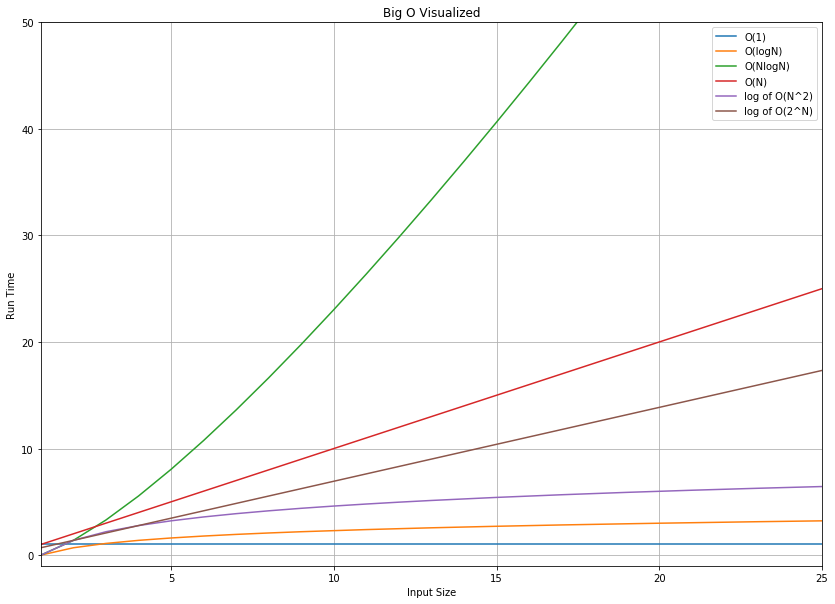

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
    
def O1(n):
    return [1]*len(n)

def OlogN(n):
    return np.log(n)
    
def ONlogN(n):
    return n*np.log(n)

def ON(n):
    return n

def ON2(n): 
    return [math.log(num**2) for num in n]

def O2N(n):
    return [math.log(2** num) for num in n]

x = range(1, 1000)

plt.figure(figsize=(14, 10))
plt.title('Big O Visualized')
plt.ylim(-1, 50)
plt.xlim(1, 25)

plt.plot( x, O1(x),label = 'O(1)')
plt.plot( x, OlogN(x), label = 'O(logN)')
plt.plot( x, ONlogN(x), label = 'O(NlogN)')
plt.plot( x, ON(x),  label='O(N)')
plt.plot( x, ON2(x), label='log of O(N^2)')
plt.plot( x, O2N(x) , label='log of O(2^N)')

plt.xlabel('Input Size')
plt.ylabel('Run Time')
plt.grid(True)
plt.legend()
#plt.savefig("big_o.png")
plt.show()